# Personal Medical Cost Prediction
#### In this project, we aim to predict personal medical charges based on individuals' demographic and lifestyle data. The dataset includes various features such as age, sex, BMI, number of children, smoking status, and region of residence. By analyzing these factors, we will develop a regression model to estimate the medical costs incurred by individuals. This prediction model can be valuable for insurance companies, healthcare providers, and policy-makers to understand the cost drivers and allocate resources more effectively.

In [126]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('C:/Users/hp/Documents/medicalcost.csv')

#### After loading the dataset, we need to conduct an initial examination to understand its structure and contents. This includes identifying missing values, duplicate entries, and any other inconsistencies.

In [127]:
data.head()
data.shape

(1338, 7)

In [128]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1334.000000,1336.000000,1336.000000
mean,39.054559,30.667328,1.092066,13271.537238
std,14.403705,6.093852,1.206622,12120.021250
min,-60.000000,15.960000,-1.000000,1121.873900
25%,26.000000,26.315000,0.000000,4733.635288
50%,39.000000,30.400000,1.000000,9369.615750
75%,51.000000,34.693750,2.000000,16687.364100
max,64.000000,53.130000,5.000000,63770.428010


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


##### We can see that our data has some missing values. We start our data cleaning process.

# Data cleaning

## 1. Handle duplicate data.

In [130]:
duplicates = data.duplicated()
print(duplicates.sum())
data=data.drop_duplicates()
duplicates = data.duplicated()
print(duplicates.sum())

3
0


## 2. Handle missing/Null values. 

In [131]:
print(data.isnull().sum())

age         0
sex         0
bmi         4
children    2
smoker      0
region      0
charges     2
dtype: int64


##### We will handle missing data in non-categorical (numerical) columns by filling them with mean values. 

In [132]:
data = data.fillna(data.mean())
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 3. Handle other absudities.

In [133]:
def count_absurd(text):
    a=0
    global li
    li=[]
    for i in data[text]:
        if i<0:
            a+=1
            li.append(i)
    return a

x=count_absurd('age')  
print("No. of negative values in column 'age' : ",x," Values = ",li)
y=count_absurd('bmi')  
print("No. of negative values in column 'bmi' : ",y," Values = ",li)
z=count_absurd('children')  
print("No. of negative values in column 'children' : ",z," Values = ",li)
w=count_absurd('charges')  
print("No. of negative values in column 'charges' : ",w," Values = ",li)

No. of negative values in column 'age' :  2  Values =  [-60, -24]
No. of negative values in column 'bmi' :  0  Values =  []
No. of negative values in column 'children' :  1  Values =  [-1.0]
No. of negative values in column 'charges' :  0  Values =  []


In [134]:
data['age'] = data['age'].abs()
data['children'] = data['children'].abs()
x=count_absurd('age') 
print("No. of negative values in column 'age' : ",x," Values = ",li)
y=count_absurd('bmi')  
print("No. of negative values in column 'bmi' : ",y," Values = ",li)
z=count_absurd('children')  
print("No. of negative values in column 'children' : ",z," Values = ",li)
w=count_absurd('charges')  
print("No. of negative values in column 'charges' : ",w," Values = ",li)

No. of negative values in column 'age' :  0  Values =  []
No. of negative values in column 'bmi' :  0  Values =  []
No. of negative values in column 'children' :  0  Values =  []
No. of negative values in column 'charges' :  0  Values =  []


In [135]:
data['children'] = data['children'].astype(int)
print(data['children'].dtype)  # should print 'int'
data.info()

int32
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int32  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 78.2+ KB


## 4. Handle outliers.

In [136]:
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
# Define threshold (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)
# Remove outliers or handle them (e.g., replace with mean)
data_cleaned = data[~outliers]

# Verify the shape of the cleaned data
print(data_cleaned.shape)
data=data_cleaned

(1306, 7)


##### Using Z-score provides a straightforward way to identify outliers based on their deviation from the mean.

## 5. Data-Encoding

In [137]:
main_data=data.replace({'sex': {'male': 0, 'female': 1},'smoker':{'yes':1,'no':0},'region':{'southwest':3,'northwest':1,'southeast':2,'northeast':0}})

In [138]:
main_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


## Data Visualization

Text(0.5, 1.0, 'Distribution of bmi')

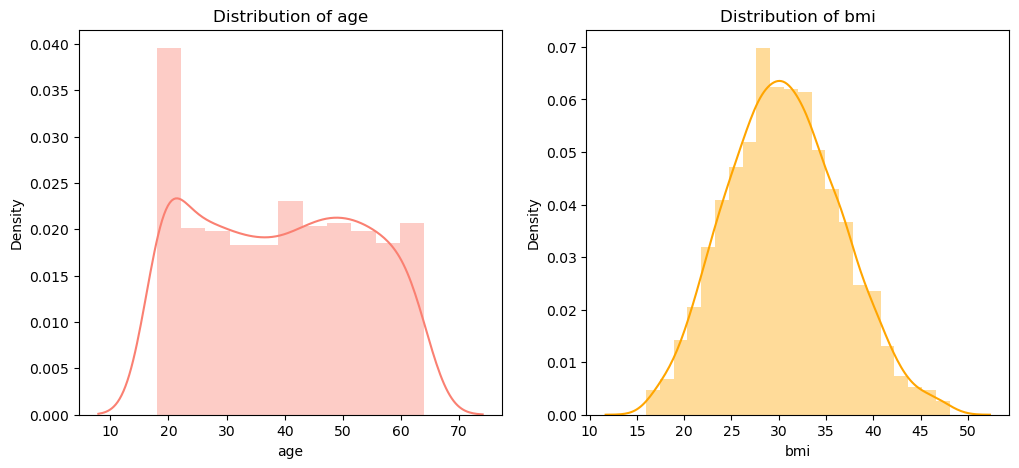

In [139]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data["age"], color = 'salmon',ax=ax)
plt.title("Distribution of age")

ax=f.add_subplot(122)
sns.distplot(data["bmi"], color = 'orange',ax=ax)
plt.title("Distribution of bmi")

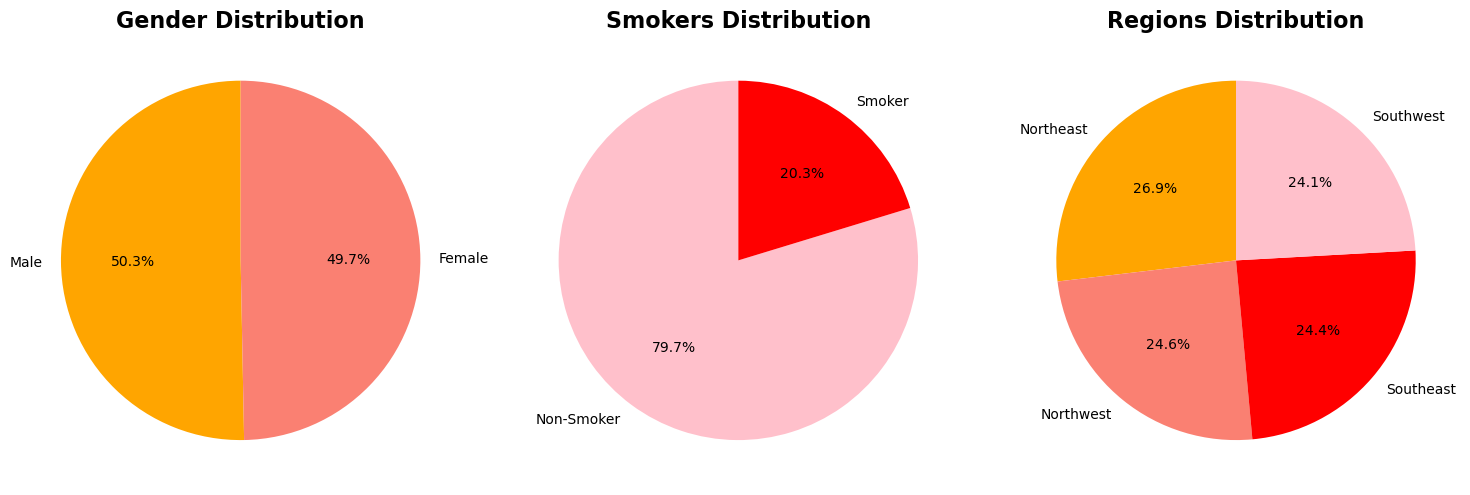

In [140]:
labels1 = ['Male', 'Female']
sizes1 = data.value_counts('sex')[0],data.value_counts('sex')[1]

labels2 = ['Non-Smoker', 'Smoker']
sizes2 = data.value_counts('smoker')[0],data.value_counts('smoker')[1]

labels3 = ['Northeast', 'Northwest','Southeast','Southwest']
sizes3 = data.value_counts('region')[0],data.value_counts('region')[1],data.value_counts('region')[2],data.value_counts('region')[3]

# Create a figure with three subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot Pie Chart 1
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['orange', 'salmon'])
ax1.set_title('Gender Distribution', fontsize=16, fontweight='bold')

# Plot Pie Chart 2
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['pink', 'red'])
ax2.set_title('Smokers Distribution', fontsize=16, fontweight='bold')

# Plot Pie Chart 3
ax3.pie(sizes3, labels=labels3, autopct='%1.1f%%', startangle=90, colors=['orange', 'salmon','red','pink'])
ax3.set_title('Regions Distribution', fontsize=16, fontweight='bold')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


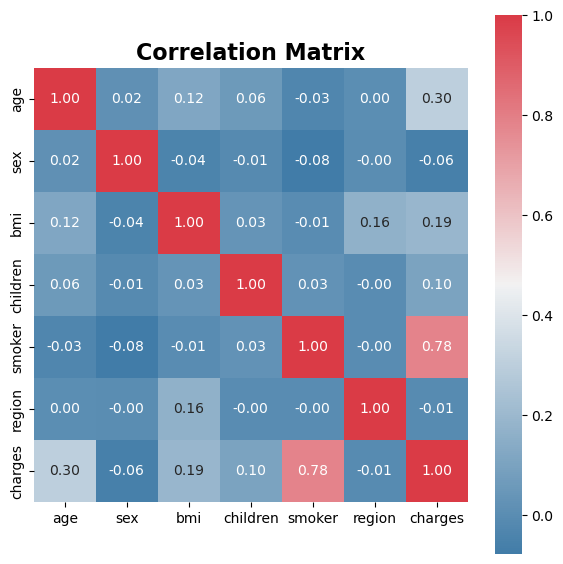

In [141]:
corr=main_data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,fmt=".2f",square=True,cmap=sns.diverging_palette(240,10,as_cmap=True))
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

#### A strong correlation is observed of charges with the smoking behaviour of the patient. Let's look at it more closely.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

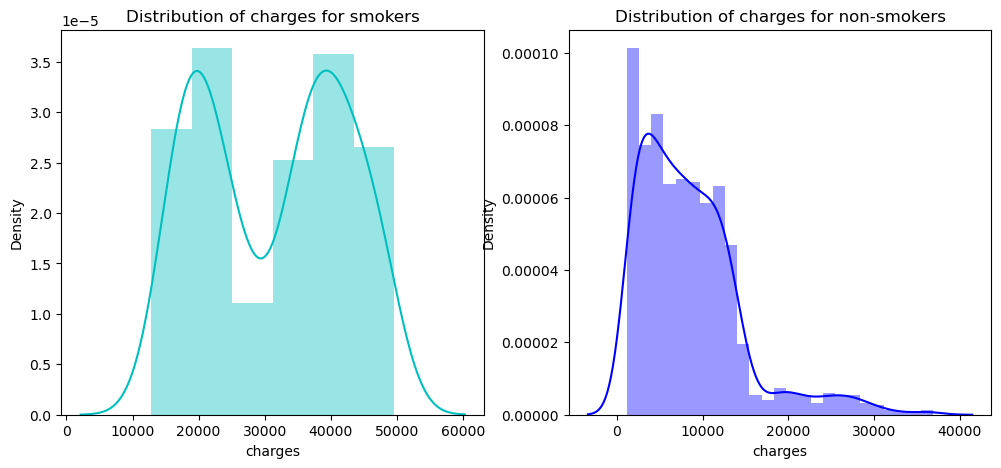

In [142]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(main_data[(main_data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(main_data[(main_data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

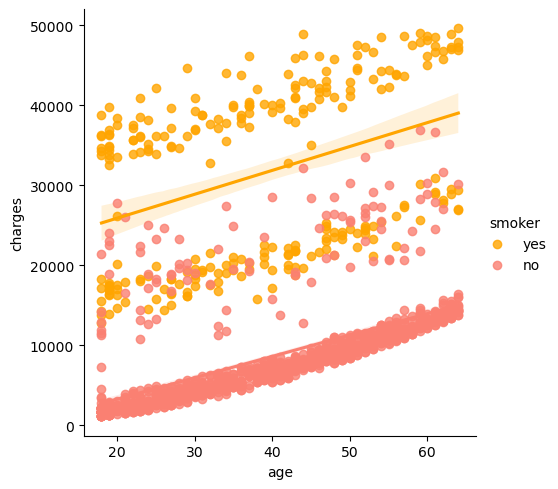

In [143]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = ['orange','salmon'])
ax.set_title('Smokers and non-smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

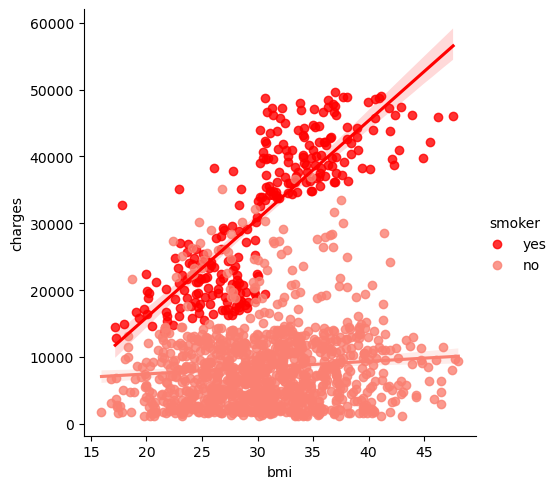

In [144]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = ['red','salmon'])
ax.set_title('Smokers and non-smokers')

#### Generally patients who smoke spend more on treatment.

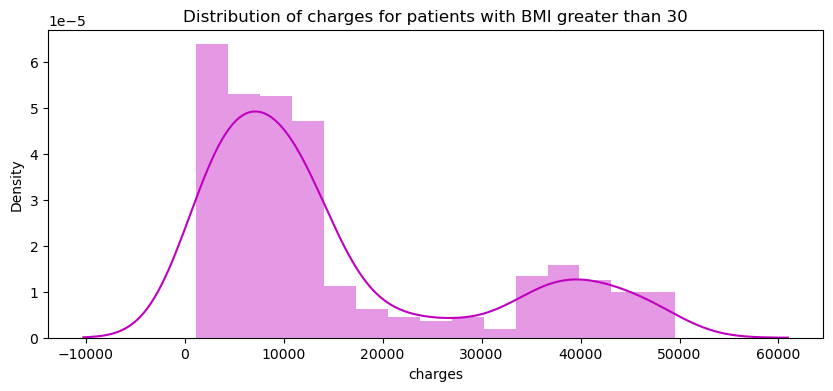

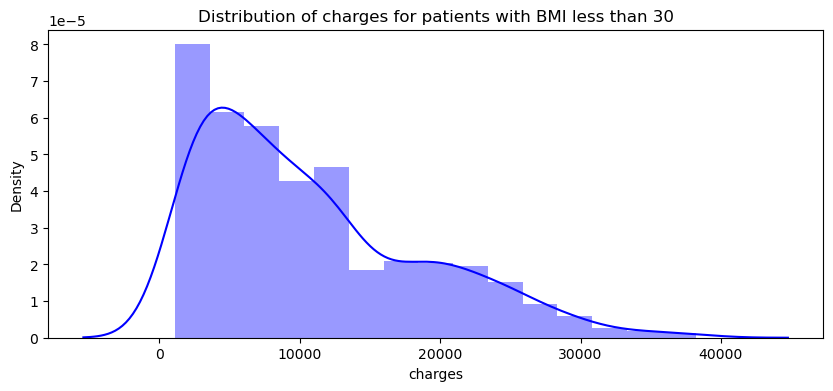

In [145]:
plt.figure(figsize=(10,4))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax1 = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

plt.figure(figsize=(10,4))
plt.title("Distribution of charges for patients with BMI less than 30")
ax2 = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

#### Also patients with bmi>30 usually spend more on treatment. And now we are going to predict the cost of treatment. Let's start with the usual linear regression.

## Setting up model

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### We first normalize the data.

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(main_data)
data1=pd.DataFrame(data_normalized)
data1.head()

,0,1,2,3,4,5,6
0,-1.439259,1.006144,-0.451092,-0.928920,1.981994,1.351323,0.321266
1,-1.510271,-0.993893,0.533370,-0.038847,-0.504542,0.446283,-0.970223
2,-0.800156,-0.993893,0.404233,1.741299,-0.504542,0.446283,-0.738162
3,-0.445099,-0.993893,-1.322349,-0.928920,-0.504542,-0.458757,0.755718
4,-0.516111,-0.993893,-0.286735,-0.928920,-0.504542,-0.458757,-0.787796


In [148]:
x = data1.drop([6], axis = 1)
y = data1[6]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7449507093346633


#### We are performing linear regression to predict Medical charges. The dataset is split into training and test sets (x_train, x_test for predictors and y_train, y_test for charges). A linear regression model (lr) is trained on the training data (x_train, y_train) and used to make predictions for both training and test sets (y_train_pred, y_test_pred). The model's performance is evaluated using the R^2 score on the test set, which measures how well the model fits the data.

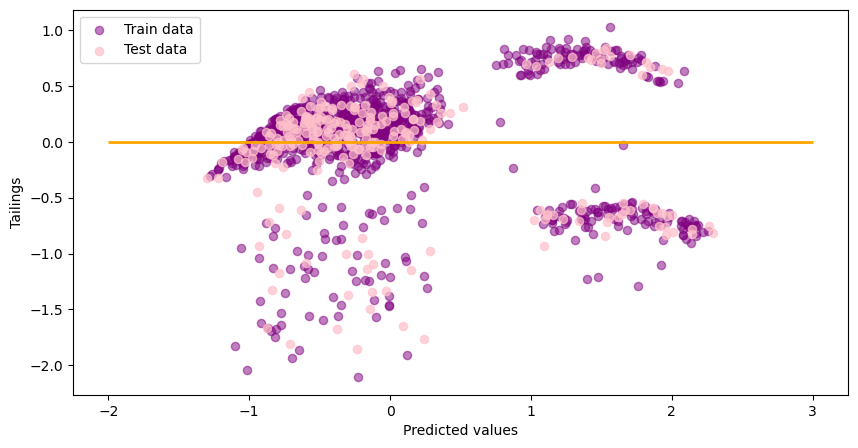

In [149]:
plt.figure(figsize=(10,5))

plt.scatter(y_train_pred,y_train_pred - y_train,
          c = 'purple', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred,y_test_pred - y_test,
          c = 'pink', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -2, xmax = 3, lw = 2, color = 'orange')
plt.show()

#### We use Matplotlib to create a scatter plot comparing predicted values to residuals (the differences between predicted and actual values) for training and test data. This visualization aids in assessing how well the Linear Regression model predicts medical charges from the dataset.

In [150]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.023, MSE test data: 0.190
R2 train data: 0.976, R2 test data: 0.830


#### We are initializing the regressor with 100 decision trees, using the Friedman mean squared error criterion and parallel processing for efficiency. After training the model on the training data (x_train, y_train), it predicts charges for both training and test sets (forest_train_pred, forest_test_pred). The code evaluates the model's performance using mean squared error (MSE) and R^2 scores, printing these metrics to assess how well the model fits the data.

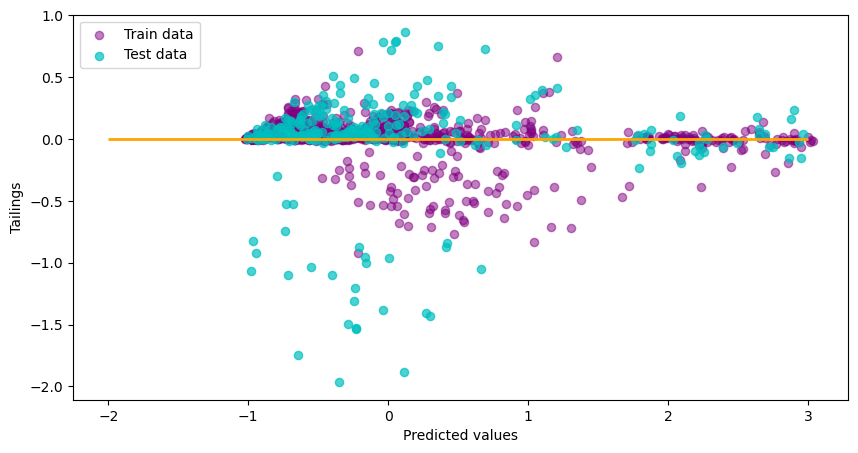

In [151]:
plt.figure(figsize=(10,5))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'purple', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -2, xmax = 3, lw = 2, color = 'orange')
plt.show()

#### This visualization aids in assessing how well the Random Forest model predicts medical charges from the dataset.

### The model achieved an R² score of 0.7449507093346633, indicating that approximately 74.5% of the variance in medical charges can be explained by the model. On the training data, the model achieved a high R² score of 0.976 with a Mean Squared Error (MSE) of 0.023, indicating excellent fit and low prediction error. On the test data, the model maintained good performance with an R² score of 0.830 and an MSE of 0.190, showcasing its ability to generalize well to unseen data. Overall, these results suggest that the model is a robust and reliable tool for predicting medical charges based on the given features.

### Thank you!